# 코로나 데이터 EDA 분석

In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 시각화 한글 폰트 설정
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
# 폰트 스타일 설정시 지정
plt.style.use("fivethirtyeight")
plt.rc("font", family="Malgun Gothic")

<AxesSubplot:title={'center':'한글'}>

C:\Users\jessi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jessi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


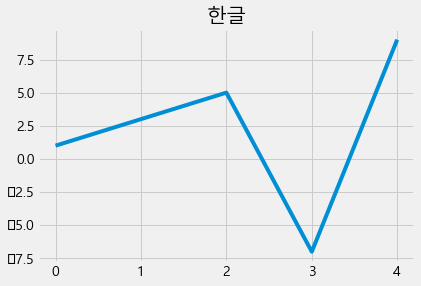

In [5]:
# 그래프 그려보기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

In [7]:
# 파일 불러오기
df_01 = pd.read_csv("data/seoul-covid19-2021-01-03.csv")
df_01.shape

(20000, 7)

In [8]:
# 일부 데이터 보기
df_01.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원


In [9]:
df_01.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
19995,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
19996,4,7,2020-01-30,마포구,중국,해외유입,퇴원
19997,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
19998,2,5,2020-01-30,중랑구,중국,해외유입,퇴원
19999,1,2,2020-01-24,강서구,중국,해외유입,퇴원


In [10]:
df_01.sample()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
18773,1227,12476,2020-06-21,구로구,-,리치웨이\r\n(이민자 쉼터),퇴원


In [11]:
# 합칠 다른 데이터도 가져오기
df_02 = pd.read_csv("data/seoul-covid19-2021-06-14.csv")
df_02.shape

(26732, 7)

In [12]:
# 일부데이터 보기
df_02.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN
1,46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN
2,46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN
3,46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN
4,46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN


In [13]:
df_02.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
26727,20005,63568,2021-01-03,마포구,-,기타 확진자 접촉,퇴원
26728,20004,63560,2021-01-03,타시도,-,타시도 확진자 접촉,퇴원
26729,20003,63545,2021-01-03,중구,-,감염경로 조사중,퇴원
26730,20002,63500,2021-01-03,구로구,-,감염경로 조사중,사망
26731,20001,63375,2021-01-03,타시도,-,감염경로 조사중,퇴원


In [15]:
# concat으로 여러 데이터 합치기
# 일반적으로 axis = 0 옵션은 행을 합치고, axis=1 옵션은 열을 합침
# 디폴트는 axis=0
# pd.concat으로 df_01, df_02 합치기
df = pd.concat([df_01, df_02])
df.shape

(46732, 7)

In [16]:
# 합친 데이터 확인
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원


In [17]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
26727,20005,63568,2021-01-03,마포구,-,기타 확진자 접촉,퇴원
26728,20004,63560,2021-01-03,타시도,-,타시도 확진자 접촉,퇴원
26729,20003,63545,2021-01-03,중구,-,감염경로 조사중,퇴원
26730,20002,63500,2021-01-03,구로구,-,감염경로 조사중,사망
26731,20001,63375,2021-01-03,타시도,-,감염경로 조사중,퇴원


In [18]:
df.sample()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
18953,27779,88284,2021-02-24,용산구,-,기타 확진자 접촉,퇴원


In [ ]:
# 인덱스 값 설정하기
# 먼저, 행의 수와 유일값이 일치하는지 확인한다

In [20]:
# shape
df.shape

(46732, 7)

In [21]:
# 연번의 nunique()
df["연번"].nunique()

46732

In [22]:
# set_index를 통해 인덱스 값을 변경한다
df.set_index("연번")

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원
...,...,...,...,...,...,...
20005,63568,2021-01-03,마포구,-,기타 확진자 접촉,퇴원
20004,63560,2021-01-03,타시도,-,타시도 확진자 접촉,퇴원
20003,63545,2021-01-03,중구,-,감염경로 조사중,퇴원


In [23]:
# df에 변경 내용을 다시 할당
df=df.set_index("연번")

In [25]:
# 인덱스 값을 기준으로 정렬한다. 이 데이터에서는 최신 데이터가 먼저 오게 정렬할 것이다.
df=df.sort_index(ascending=False)
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN


In [26]:
df.tail()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
2,5,2020-01-30,중랑구,중국,해외유입,퇴원
1,2,2020-01-24,강서구,중국,해외유입,퇴원


In [ ]:
# 판다스의 attributes
# shape, dtypes, columns, index -> 괄호가 필요 없다

In [27]:
df.shape

(46732, 6)

In [28]:
df.dtypes

환자       int64
확진일     object
거주지     object
여행력     object
접촉력     object
퇴원현황    object
dtype: object

In [29]:
df.columns

Index(['환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황'], dtype='object')

In [30]:
df.index

Int64Index([46732, 46731, 46730, 46729, 46728, 46727, 46726, 46725, 46724,
            46723,
            ...
               10,     9,     8,     7,     6,     5,     4,     3,     2,
                1],
           dtype='int64', name='연번', length=46732)

In [31]:
# 데이터 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46732 entries, 46732 to 1
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   환자      46732 non-null  int64 
 1   확진일     46732 non-null  object
 2   거주지     46732 non-null  object
 3   여행력     46732 non-null  object
 4   접촉력     46732 non-null  object
 5   퇴원현황    44118 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


In [32]:
# 결측치 보기
# df 데이터의 결측치 합계
df.isnull().sum()

환자         0
확진일        0
거주지        0
여행력        0
접촉력        0
퇴원현황    2614
dtype: int64

In [34]:
# 평균을 통해 결측치의 비율을 알 수 있다
df.isnull().mean() * 100

환자      0.000000
확진일     0.000000
거주지     0.000000
여행력     0.000000
접촉력     0.000000
퇴원현황    5.593598
dtype: float64

In [35]:
# 기술통계 값
df.describe() # 수치형 데이터 기술통계

,환자
count,46732.000000
mean,76964.882885
std,40747.410181
min,2.000000
25%,41485.750000
50%,75150.000000
75%,112701.000000
max,148645.000000


In [36]:
# 범주형 데이터 기술통계값
df.describe(include="object")

,확진일,거주지,여행력,접촉력,퇴원현황
count,46732,46732,46732,46732,44118
unique,476,27,151,779,2
top,2020-12-17,송파구,-,기타 확진자 접촉,퇴원
freq,588,2824,45565,15721,43617


In [ ]:
# 날짜 데이터 타입 변경

In [37]:
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN


In [39]:
# 확진일 Series 형태로 가져오기
df["확진일"]

연번
46732    2021-06-14
46731    2021-06-14
46730    2021-06-14
46729    2021-06-14
46728    2021-06-14
            ...    
5        2020-01-31
4        2020-01-30
3        2020-01-30
2        2020-01-30
1        2020-01-24
Name: 확진일, Length: 46732, dtype: object

In [40]:
# pd.to_datetime을 통한 데이터 타입 변경 (날짜형식으로 변환)
df["확진일"] = pd.to_datetime(df["확진일"])
df["확진일"].head()

연번
46732   2021-06-14
46731   2021-06-14
46730   2021-06-14
46729   2021-06-14
46728   2021-06-14
Name: 확진일, dtype: datetime64[ns]

In [ ]:
# 파생변수 만들기 (연, 월, 일, 요일)

In [42]:
df["연도"] = df["확진일"].dt.year # 연도
df["월"]=df["확진일"].dt.month # 월
df["일"]=df["확진일"].dt.day # 일
df["요일"]=df["확진일"].dt.dayofweek # 요일

In [45]:
df[["확진일", "연도", "월", "일", "요일"]].head()

,확진일,연도,월,일,요일
연번,,,,,
46732,2021-06-14,2021,6,14,0
46731,2021-06-14,2021,6,14,0
46730,2021-06-14,2021,6,14,0
46729,2021-06-14,2021,6,14,0
46728,2021-06-14,2021,6,14,0


In [48]:
# 연도-월 파생변수 만들기
# astype(str)을 통해 수치데이터 -> 문자데이터로 변환하고 문자열 연결
df["연도월"] = df["확진일"].astype(str).str[:7]

In [49]:
df["연도월"]

연번
46732    2021-06
46731    2021-06
46730    2021-06
46729    2021-06
46728    2021-06
          ...   
5        2020-01
4        2020-01
3        2020-01
2        2020-01
1        2020-01
Name: 연도월, Length: 46732, dtype: object

In [50]:
# 요일 한글로 만들기
dayofweek = "월화수목금토일"
dayofweek[0]

'월'

In [52]:
# 요일명 반환해주는 함수 만들기
# 숫자를 넣으면 요일 반환
def find_dayofweek(day_no):
    dayofweek = "월화수목금토일"
    return dayofweek[day_no]

In [53]:
find_dayofweek(1)

'화'

In [54]:
df["요일"]

연번
46732    0
46731    0
46730    0
46729    0
46728    0
        ..
5        4
4        3
3        3
2        3
1        4
Name: 요일, Length: 46732, dtype: int64

In [55]:
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월
연번,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN,2021,6,14,0,2021-06


In [59]:
# map 사용해서 요일컬럼을 요일명으로 변환, "요일명"이라는 새로운 컬럼 생성
df["요일명"] =df["요일"].map(find_dayofweek)
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월


In [61]:
# 임의 데이터를 불러와 변환이 잘 되었는지 확인
df[["요일", "요일명"]].sample(5)

,요일,요일명
연번,,
42255,4,금
24724,2,수
40630,4,금
2964,6,일
28445,0,월


In [63]:
df["영문요일"] = df["확진일"].dt.day_name()

In [64]:
# 전체 수치 변수 기술통계값, 히스토그램
df.describe()

,환자,연도,월,일,요일
count,46732.000000,46732.000000,46732.000000,46732.000000,46732.000000
mean,76964.882885,2020.585038,6.364354,15.874904,2.933728
std,40747.410181,0.492721,3.958985,8.805127,1.914244
min,2.000000,2020.000000,1.000000,1.000000,0.000000
25%,41485.750000,2020.000000,3.000000,8.000000,1.000000
50%,75150.000000,2021.000000,5.000000,16.000000,3.000000
75%,112701.000000,2021.000000,11.000000,24.000000,5.000000
max,148645.000000,2021.000000,12.000000,31.000000,6.000000


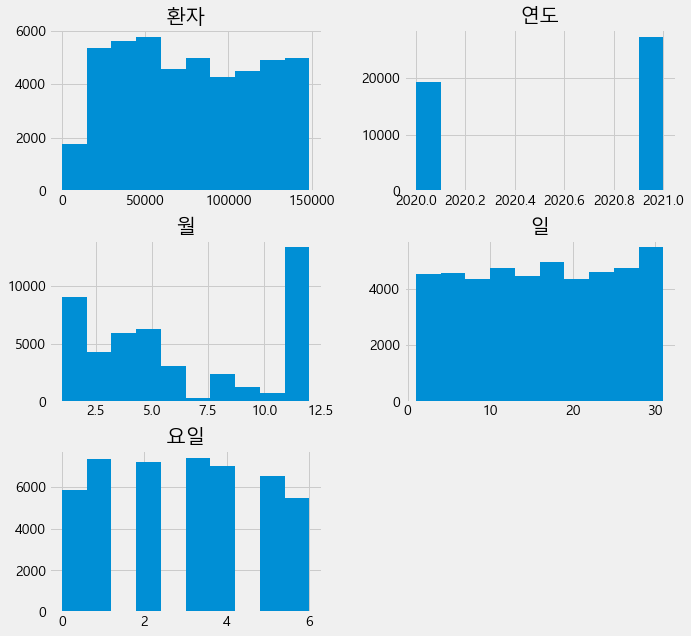

In [65]:
_ = df.hist(figsize=(10, 10))

In [ ]:
# 하나의 변수에 대한 빈도수 구하기

In [66]:
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,영문요일
연번,,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday


In [67]:
# 연도
df["연도"].value_counts()

2021    27340
2020    19392
Name: 연도, dtype: int64

In [71]:
# 연도 컬럼의 비율
df["연도"].value_counts(normalize=True) * 100

2021    58.503809
2020    41.496191
Name: 연도, dtype: float64

In [73]:
# 연도월 빈도수 구하기, 인덱스 순서대로 정렬
# year_month라는 변수에 할당
year_month = df["연도월"].value_counts().sort_index()
year_month

2020-01        7
2020-02       80
2020-03      391
2020-04      156
2020-05      229
2020-06      459
2020-07      281
2020-08     2415
2020-09     1306
2020-10      733
2020-11     2904
2020-12    10431
2021-01     4879
2021-02     4061
2021-03     3898
2021-04     5804
2021-05     6030
2021-06     2668
Name: 연도월, dtype: int64

<AxesSubplot:title={'center':'연도별 확진자 수'}>

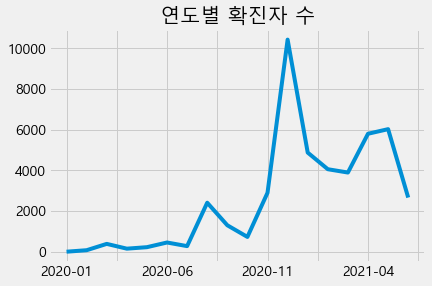

In [74]:
# 연도월 시각화
year_month.plot(title="연도별 확진자 수")

In [ ]:
# 막대그래프로 시각화

<AxesSubplot:title={'center':'연도별 확진자 수'}>

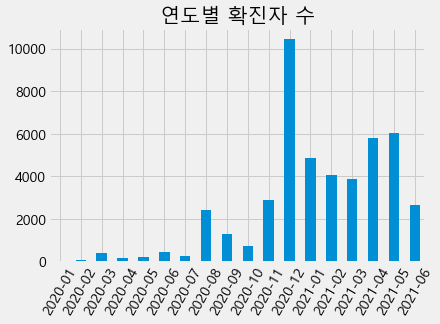

In [77]:
year_month.plot.bar(title="연도별 확진자 수", rot=60)

In [81]:
# 요일별 빈도수
# weekday_count 변수에 할당
weekday_count = df["요일명"].value_counts().sort_index()
weekday_count

금    7011
목    7379
수    7177
월    5866
일    5453
토    6500
화    7346
Name: 요일명, dtype: int64

In [82]:
# 리스트컴프리헨션 사용해서 인덱스 값을 다시 정렬
weekday_list = [i for i in "월화수목금토일"]
weekday_count[weekday_list]

월    5866
화    7346
수    7177
목    7379
금    7011
토    6500
일    5453
Name: 요일명, dtype: int64

In [87]:
# 또 다른 방법
wc = df["요일"].value_counts().sort_index()
wc.index = weekday_list
wc

월    5866
화    7346
수    7177
목    7379
금    7011
토    6500
일    5453
Name: 요일, dtype: int64

<AxesSubplot:title={'center':'요일별 확진자 수'}>

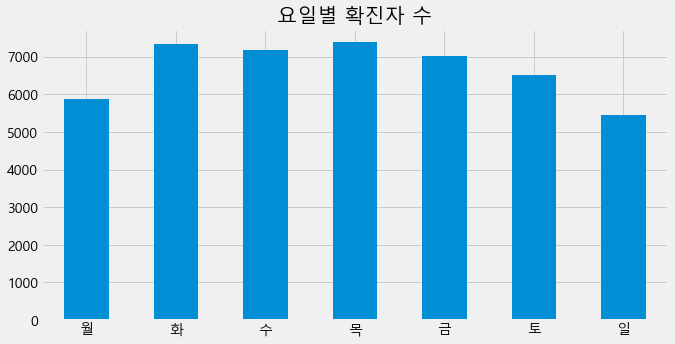

In [90]:
wc.plot.bar(figsize=(10, 5), rot=0, title="요일별 확진자 수")

In [93]:
# 확진일 빈도수 구하기
day_count = df["확진일"].value_counts().sort_index()
day_count

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-06-10    202
2021-06-11    208
2021-06-12    176
2021-06-13    122
2021-06-14    132
Name: 확진일, Length: 476, dtype: int64

<AxesSubplot:>

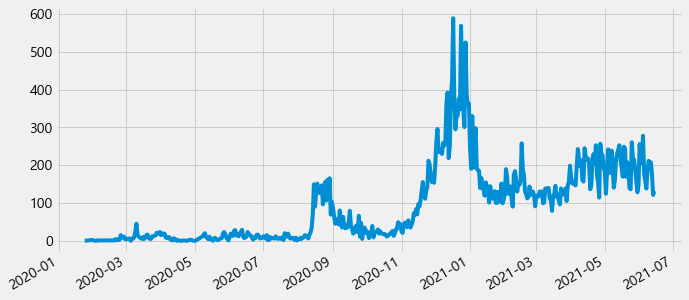

In [94]:
# 선 그래프로 시각화
day_count.plot.line(figsize=(10, 5))

In [ ]:
# 전체 확진일 데이터 만들기

In [96]:
# 초기 데이터
df.tail(10)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,영문요일
연번,,,,,,,,,,,,,
10,21,2020-02-05,성북구,-,종로구 집단발병,퇴원,2020,2,5,2,2020-02,수,Wednesday
9,19,2020-02-05,송파구,싱가폴,해외유입,퇴원,2020,2,5,2,2020-02,수,Wednesday
8,13,2020-02-02,타시도,중국,해외유입,퇴원,2020,2,2,6,2020-02,일,Sunday
7,11,2020-01-31,종로구,-,종로구 집단발병,퇴원,2020,1,31,4,2020-01,금,Friday
6,10,2020-01-31,종로구,-,종로구 집단발병,퇴원,2020,1,31,4,2020-01,금,Friday
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금,Friday
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,Thursday
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목,Thursday
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,Thursday


In [ ]:
# iloc를 통해 첫 확진일과 마지막 확진일자 찾기
# iloc는 위치 기반 인덱싱
# loc는 레이블 기반 인덱싱

In [98]:
last_day = df.iloc[0,1]
last_day # 최신 확진일

Timestamp('2021-06-14 00:00:00')

In [99]:
first_day = df.iloc[-1, 1]
first_day # 첫 번째 확진 날짜

Timestamp('2020-01-24 00:00:00')

In [100]:
# pd.date_range로 전체 기간 데이터 생성
# 전체 기간 생성
all_day = pd.date_range(first_day, last_day)
# 데이터 프레임으로 변환
df_all_day = all_day.to_frame()

In [102]:
# 확진수 컬럼 추가 (위에서 생성한 day_count 데이터 사용)
df_all_day["확진수"] = day_count
df_all_day

,0,확진수
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,NaN
2020-01-26,2020-01-26,NaN
2020-01-27,2020-01-27,NaN
2020-01-28,2020-01-28,NaN
...,...,...
2021-06-10,2021-06-10,202.0
2021-06-11,2021-06-11,208.0
2021-06-12,2021-06-12,176.0
2021-06-13,2021-06-13,122.0


In [103]:
# 필요없는 컬럼 삭제
del df_all_day[0]

In [104]:
df_all_day.head()

,확진수
2020-01-24,1.0
2020-01-25,NaN
2020-01-26,NaN
2020-01-27,NaN
2020-01-28,NaN


In [107]:
# 결측치 채우기
# 비어있는 날짜는 확진자가 없었으므로 0으로 채워준다
df_all_day["확진수"] = df_all_day["확진수"].fillna(0)
df_all_day

,확진수
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,0.0
...,...
2021-06-10,202.0
2021-06-11,208.0
2021-06-12,176.0
2021-06-13,122.0


<AxesSubplot:>

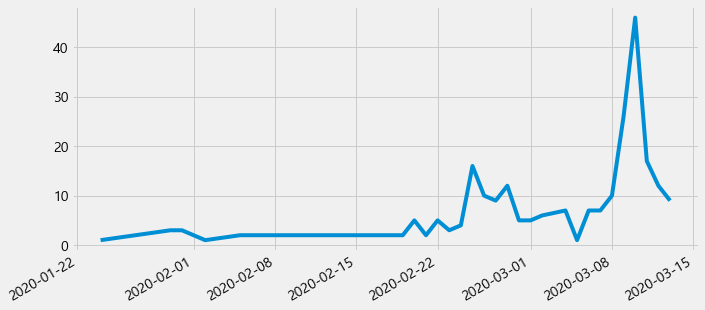

In [115]:
day_count_30 = day_count.head(30)
day_count_30.plot.line(figsize=(10, 5))

In [ ]:
# 누적 확진수 구하기

In [118]:
df_all_day["누적확진수"] = df_all_day["확진수"].cumsum()
df_all_day

,확진수,누적확진수
2020-01-24,1.0,1.0
2020-01-25,0.0,1.0
2020-01-26,0.0,1.0
2020-01-27,0.0,1.0
2020-01-28,0.0,1.0
...,...,...
2021-06-10,202.0,46094.0
2021-06-11,208.0,46302.0
2021-06-12,176.0,46478.0
2021-06-13,122.0,46600.0


In [120]:
# 결측치 처리
df_all_day["누적확진수"] = df_all_day["누적확진수"].fillna(method="ffill")

In [121]:
df_all_day

,확진수,누적확진수
2020-01-24,1.0,1.0
2020-01-25,0.0,1.0
2020-01-26,0.0,1.0
2020-01-27,0.0,1.0
2020-01-28,0.0,1.0
...,...,...
2021-06-10,202.0,46094.0
2021-06-11,208.0,46302.0
2021-06-12,176.0,46478.0
2021-06-13,122.0,46600.0


<AxesSubplot:title={'center':'확진수'}>

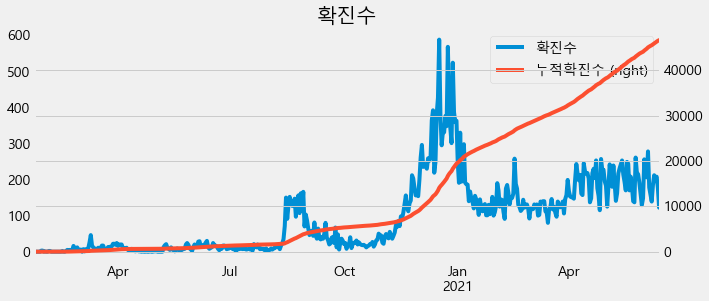

In [122]:
# 시각화
df_all_day.plot(secondary_y="누적확진수", figsize=(10, 4), title="확진수")

In [123]:
# 거주지 빈도수
df["거주지"].value_counts()

송파구     2824
강남구     2768
강서구     2255
타시도     2191
노원구     2157
관악구     2140
기타      2113
중랑구     2070
서초구     2011
은평구     2010
동작구     1943
성북구     1936
강동구     1886
동대문구    1732
영등포구    1727
양천구     1623
구로구     1546
광진구     1533
마포구     1485
도봉구     1439
강북구     1354
성동구     1277
용산구     1262
서대문구    1179
종로구      786
금천구      777
중구       708
Name: 거주지, dtype: int64

<AxesSubplot:>

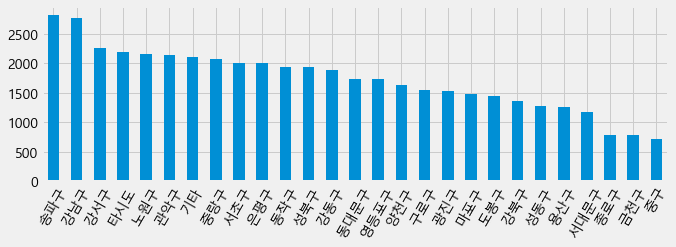

In [126]:
# gu_count에 할당
gu_count=df["거주지"].value_counts()

# 시각화
gu_count.plot.bar(figsize=(10, 3), rot=60)

<AxesSubplot:>

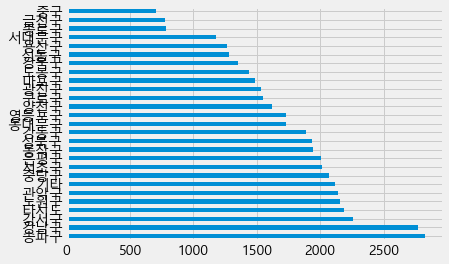

In [127]:
gu_count.plot.barh()

In [128]:
# 타시도, 기타 전처리
# 거주지의 사본 거주구 생성
df["거주구"] = df["거주지"]
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,영문요일,거주구
연번,,,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday,타시도


In [ ]:
# 앞, 뒤 공백 제거

In [129]:
df["거주구"] = df["거주구"].str.strip()

In [132]:
# 타시도를 기타로 변경
df.loc[df["거주구"] == "타시도", "거주구"] = "기타"

In [134]:
# 거주구의 빈도수
gu_count = df["거주구"].value_counts()
gu_count

기타      4304
송파구     2824
강남구     2768
강서구     2255
노원구     2157
관악구     2140
중랑구     2070
서초구     2011
은평구     2010
동작구     1943
성북구     1936
강동구     1886
동대문구    1732
영등포구    1727
양천구     1623
구로구     1546
광진구     1533
마포구     1485
도봉구     1439
강북구     1354
성동구     1277
용산구     1262
서대문구    1179
종로구      786
금천구      777
중구       708
Name: 거주구, dtype: int64

<AxesSubplot:>

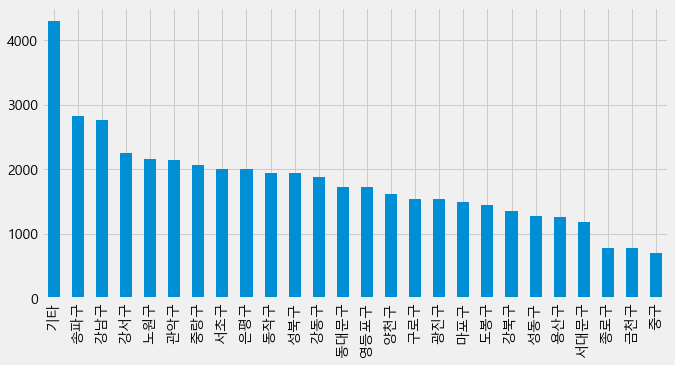

In [135]:
# 시각화
gu_count.plot.bar(figsize=(10, 5))

In [ ]:
# 두 개의 변수에 대한 빈도수

In [137]:
# 연도, 퇴원현황 빈도 분석
pd.crosstab(df['연도'], df['퇴원현황'])

퇴원현황,사망,퇴원
연도,,
2020,306,19058
2021,195,24559


In [139]:
# 빈도 비율
pd.crosstab(df['연도'], df['퇴원현황'], normalize=True) * 100

퇴원현황,사망,퇴원
연도,,
2020,0.693594,43.197788
2021,0.441996,55.666621


In [141]:
# 연도, 월 빈도분석
ym = pd.crosstab(df['연도'], df['월'])
ym

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,7,80,391,156,229,459,281,2415,1306,733,2904,10431
2021,4879,4061,3898,5804,6030,2668,0,0,0,0,0,0


<AxesSubplot:xlabel='월'>

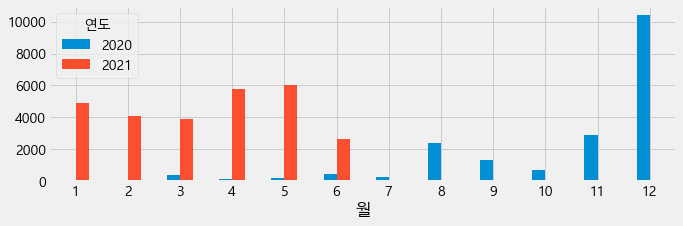

In [144]:
# 시각화
ym.T.plot.bar(figsize=(10, 3), rot=0)

In [145]:
# 연도, 요일 빈도분석
yw = pd.crosstab(df["연도"], df["요일"])
yw

요일,0,1,2,3,4,5,6
연도,,,,,,,
2020,2626,2895,2890,3462,2700,2676,2143
2021,3240,4451,4287,3917,4311,3824,3310


In [146]:
# 요일 컬럼명 바꿔주기 (리스트컴프리헨션 사용)
yw.columns = weekday_list
yw

,월,화,수,목,금,토,일
연도,,,,,,,
2020,2626,2895,2890,3462,2700,2676,2143
2021,3240,4451,4287,3917,4311,3824,3310


In [147]:
# 거주구, 연도월에 대한 빈도분석
gu_m = pd.crosstab(df["거주구"], df["연도월"])
gu_m

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06
거주구,,,,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,8,15,88,84,87,156,422,226,118,240,428,529,292
강동구,0,4,6,3,11,11,14,94,42,19,74,303,180,161,252,253,314,145
강북구,0,0,5,0,9,10,4,85,31,15,41,245,174,124,125,133,266,87
강서구,1,1,20,4,19,33,25,117,65,22,305,729,213,96,133,217,189,66
관악구,0,4,30,9,16,58,27,106,135,86,74,473,163,182,129,313,226,109
광진구,0,1,5,2,6,3,5,74,34,11,43,279,119,155,253,239,214,90
구로구,0,1,33,1,6,45,5,60,32,22,72,348,179,237,126,142,183,54
금천구,0,1,11,0,3,17,7,34,20,5,27,201,72,69,26,84,146,54
기타,0,10,22,13,12,25,12,175,128,82,204,1620,612,415,243,319,249,163


In [148]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

In [149]:
# 표로 보면 보기 힘드니 시각화 진행
# background_gradient()로 빈도수 표현
gu_m.style.background_gradient(cmap = "Greens")

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06
거주구,,,,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,8,15,88,84,87,156,422,226,118,240,428,529,292
강동구,0,4,6,3,11,11,14,94,42,19,74,303,180,161,252,253,314,145
강북구,0,0,5,0,9,10,4,85,31,15,41,245,174,124,125,133,266,87
강서구,1,1,20,4,19,33,25,117,65,22,305,729,213,96,133,217,189,66
관악구,0,4,30,9,16,58,27,106,135,86,74,473,163,182,129,313,226,109
광진구,0,1,5,2,6,3,5,74,34,11,43,279,119,155,253,239,214,90
구로구,0,1,33,1,6,45,5,60,32,22,72,348,179,237,126,142,183,54
금천구,0,1,11,0,3,17,7,34,20,5,27,201,72,69,26,84,146,54
기타,0,10,22,13,12,25,12,175,128,82,204,1620,612,415,243,319,249,163


In [158]:
# 편의상 잔차로 행과 열 바꿔주기
gu_m.T.style.background_gradient(cmap = "Greens")

거주구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도월,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,1
2020-02,7,4,0,1,4,1,1,1,10,8,0,1,1,0,4,4,3,1,12,1,1,0,7,8,0,0
2020-03,34,6,5,20,30,5,33,11,22,12,6,25,23,16,9,21,3,13,15,17,18,12,14,4,5,12
2020-04,23,3,0,4,9,2,1,0,13,3,3,5,7,7,6,13,13,9,10,3,4,6,7,1,1,3
2020-05,11,11,9,19,16,6,6,3,12,8,10,3,9,3,8,4,21,5,11,7,11,20,7,3,3,3
2020-06,8,11,10,33,58,3,45,17,25,13,43,4,13,12,8,15,9,4,7,42,29,12,18,3,3,14
2020-07,15,14,4,25,27,5,5,7,12,6,2,6,17,14,6,7,8,9,44,1,7,4,11,6,8,11
2020-08,88,94,85,117,106,74,60,34,175,192,73,74,110,79,52,79,33,244,161,78,67,48,122,37,30,103
2020-09,84,42,31,65,135,34,32,20,128,60,69,34,57,30,34,52,30,48,79,31,53,21,65,23,8,41


In [152]:
# gu_m 에서 ["강남구", "서초구", "송파구"] 만 가져오기
gu_m.loc[["강남구", "서초구", "송파구"]]

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06
거주구,,,,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,8,15,88,84,87,156,422,226,118,240,428,529,292
서초구,0,4,21,13,4,15,7,79,52,39,239,353,143,108,162,360,265,147
송파구,0,12,15,10,11,7,44,161,79,61,210,508,242,209,208,382,440,225


In [156]:
# gu_m에서 ["2021-04", "2021-05"] 만 가져오기
gu_m[["2021-04", "2021-05"]]

연도월,2021-04,2021-05
거주구,,
강남구,428,529
강동구,253,314
강북구,133,266
강서구,217,189
관악구,313,226
광진구,239,214
구로구,142,183
금천구,84,146
기타,319,249


In [160]:
# 시각화
gu_m[["2021-04", "2021-05"]].style.background_gradient()

연도월,2021-04,2021-05
거주구,,
강남구,428,529
강동구,253,314
강북구,133,266
강서구,217,189
관악구,313,226
광진구,239,214
구로구,142,183
금천구,84,146
기타,319,249


In [161]:
# gu_month 에서 ["강남구", "서초구", "송파구"]와 ["2021-04", "2021-05"] 만 가져오기
# .loc[행, 열]
gu_m.loc[["강남구", "서초구", "송파구"], ["2021-04", "2021-05"]]

연도월,2021-04,2021-05
거주구,,
강남구,428,529
서초구,360,265
송파구,382,440


In [ ]:
# Boolean Indexing으로 특정 조건 값 찾가

In [162]:
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,영문요일,거주구
연번,,,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday,기타
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday,성동구
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday,중랑구
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday,강동구
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday,광진구


In [166]:
# 여러 조건 비교
# 강남구에서 "일요일"에 확진된 데이터만 찾기
# .loc[행]
# .loc[행, 열]
# .loc[조건, 열]
df.loc[(df["거주구"] == '강남구') & (df["요일명"] == '일'), "접촉력"]

연번
46594     감염경로 조사중
46581    기타 확진자 접촉
46580     감염경로 조사중
46568     감염경로 조사중
46542     감염경로 조사중
           ...    
430       감염경로 조사중
429           해외유입
428           해외유입
126          EZHLD
90        감염경로 조사중
Name: 접촉력, Length: 308, dtype: object

In [167]:
# 거주구가 강남구이며, 여행력이 일본인 데이터 찾기
df[(df["거주구"]=='강남구') & df["여행력"].str.contains("일본")]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,영문요일,거주구
연번,,,,,,,,,,,,,,
31136,99978,2021-03-24,강남구,일본,감염경로 조사중,퇴원,2021,3,24,2,2021-03,수,Wednesday,강남구
12540,44037,2020-12-14,강남구,일본,해외유입,퇴원,2020,12,14,0,2020-12,월,Monday,강남구


In [ ]:
# str.contains 활용

In [168]:
# 접촉력의 영문자 검색을 위해 영문자를 모두 대문자로 만들고 "접촉력_대문자"컬럼을 생성
df["접촉력_대문자"] = df["접촉력"].str.upper()

In [169]:
# "접촉력_대문자" 컬럼으로 PC방 데이터를 찾고 접촉력 컬럼에 대해서만 빈도수 구하기

df.loc[df["접촉력_대문자"].str.contains("PC"), "접촉력"].value_counts()

강북구 소재 PC방 관련    35
강남구 소재 PC방 관련    32
강북구 소재 pc방 관련    23
동대문관련(교회pc방)     20
성동구 소재 PC방 관련    10
금천구 소재 PC방 관련     9
Name: 접촉력, dtype: int64

In [170]:
# str.contains로 여행력이 영국,프랑스,독일,스페인 인 데이터 찾기
df.loc[df["여행력"].str.contains("영국|프랑스|독일|스페인")]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,영문요일,거주구,접촉력_대문자
연번,,,,,,,,,,,,,,,
45325,144502,2021-06-06,양천구,영국,해외유입,퇴원,2021,6,6,6,2021-06,일,Sunday,양천구,해외유입
44571,142272,2021-06-03,용산구,독일,기타 확진자 접촉,퇴원,2021,6,3,3,2021-06,목,Thursday,용산구,기타 확진자 접촉
41854,133614,2021-05-19,동대문구,프랑스,해외유입,퇴원,2021,5,19,2,2021-05,수,Wednesday,동대문구,해외유입
41030,131613,2021-05-15,은평구,독일,해외유입,퇴원,2021,5,15,5,2021-05,토,Saturday,은평구,해외유입
38740,124815,2021-05-04,기타,독일,해외유입,퇴원,2021,5,4,1,2021-05,화,Tuesday,기타,해외유입
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,8044,2020-03-13,마포구,프랑스,해외유입,퇴원,2020,3,13,4,2020-03,금,Friday,마포구,해외유입
236,8053,2020-03-13,노원구,영국,해외유입,퇴원,2020,3,13,4,2020-03,금,Friday,노원구,해외유입
230,7923,2020-03-12,관악구,스페인,해외유입,퇴원,2020,3,12,3,2020-03,목,Thursday,관악구,해외유입


In [ ]:
# isin으로 여러값 찾기

In [ ]:
# "거주구"가 "강남구", "서초구", "송파구" 인 데이터만 찾기
# loc를 통해 해당 조건의 "접촉력" 컬럼만 가져오기

In [171]:
df.loc[df["거주구"].isin(["강남구", "서초구", "송파구"]), "접촉력"]

연번
46719                병원 및 요양시설
46717                기타 확진자 접촉
46713    동대문구 소재 직장 관련('21.6.)
46712                 감염경로 조사중
46708                기타 확진자 접촉
                 ...          
31                  타시도 확진자 접촉
30                  타시도 확진자 접촉
26                  타시도 확진자 접촉
23                  타시도 확진자 접촉
9                         해외유입
Name: 접촉력, Length: 7603, dtype: object

In [ ]:
# 여행력

In [172]:
#  접촉력이 해외유입인 데이터에 대해 "해외유입" 변수 만들기
df["해외유입"] = df["접촉력"] == "해외유입"
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,영문요일,거주구,접촉력_대문자,해외유입
연번,,,,,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday,기타,감염경로 조사중,False


In [173]:
# 거주구, 해외유입 빈도분석
pd.crosstab(df["거주구"], df["해외유입"])

해외유입,False,True
거주구,,
강남구,2674,94
강동구,1836,50
강북구,1337,17
강서구,2214,41
관악구,2109,31
광진구,1515,18
구로구,1532,14
금천구,771,6
기타,4105,199


In [175]:
# 거주구, 해외유입 빈도 비율
gu_oversea = pd.crosstab(df["거주구"], df["해외유입"], normalize=True) * 100
gu_oversea

해외유입,False,True
거주구,,
강남구,5.721989,0.201147
강동구,3.928785,0.106993
강북구,2.860995,0.036378
강서구,4.737653,0.087734
관악구,4.512968,0.066336
광진구,3.241890,0.038518
구로구,3.278268,0.029958
금천구,1.649833,0.012839
기타,8.784131,0.425832


<AxesSubplot:ylabel='거주구'>

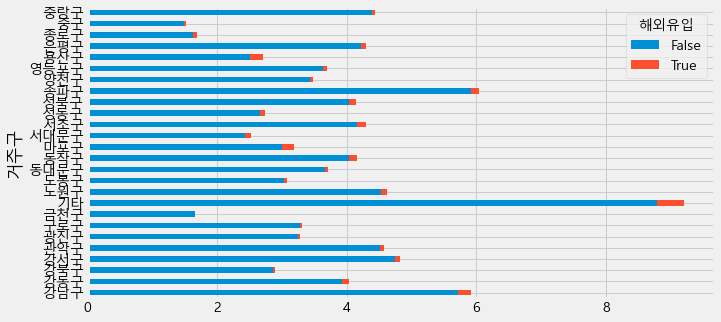

In [177]:
# 해외유입 여부에 따라 막대그래프를 그리기
# stacked=True 옵션을 사용하면 두가지를 함께 그릴 수 있다 (쌓아올려서 하나의 그래프로 만듦)

gu_oversea.plot.barh(stacked=True, figsize = (10, 5))

In [ ]:
# pivot table 사용하기

In [178]:
# 거주구별 해외유입 여부에 따른 빈도수
gu_oversea_count = pd.pivot_table(data=df, index="거주구", columns="해외유입",
                                 values="환자", aggfunc="count")
gu_oversea_count

해외유입,False,True
거주구,,
강남구,2674,94
강동구,1836,50
강북구,1337,17
강서구,2214,41
관악구,2109,31
광진구,1515,18
구로구,1532,14
금천구,771,6
기타,4105,199


In [179]:
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,영문요일,거주구,접촉력_대문자,해외유입
연번,,,,,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday,기타,감염경로 조사중,False
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday,성동구,감염경로 조사중,False
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday,중랑구,감염경로 조사중,False
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday,강동구,감염경로 조사중,False
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,Monday,광진구,감염경로 조사중,False


In [182]:
# 거주구, 요일별 확진자 빈도수
gu_week = pd.pivot_table(data=df, index="거주구", columns="요일",
                        values="환자", aggfunc="count")
gu_week.columns = weekday_list
gu_week

,월,화,수,목,금,토,일
거주구,,,,,,,
강남구,363,438,464,367,435,393,308
강동구,247,275,299,286,273,263,243
강북구,219,214,205,208,186,159,163
강서구,275,314,362,353,402,316,233
관악구,257,371,323,339,300,300,250
광진구,183,252,237,232,240,191,198
구로구,228,227,235,247,221,230,158
금천구,84,138,112,122,100,116,105
기타,614,569,625,1015,526,521,434


In [185]:
# 시각화
gu_week.style.background_gradient()

,월,화,수,목,금,토,일
거주구,,,,,,,
강남구,363,438,464,367,435,393,308
강동구,247,275,299,286,273,263,243
강북구,219,214,205,208,186,159,163
강서구,275,314,362,353,402,316,233
관악구,257,371,323,339,300,300,250
광진구,183,252,237,232,240,191,198
구로구,228,227,235,247,221,230,158
금천구,84,138,112,122,100,116,105
기타,614,569,625,1015,526,521,434


In [ ]:
# groupby 사용하기

In [186]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하기
gu_over = df.groupby(["거주구", "해외유입"])["환자"].count()
gu_over

거주구   해외유입 
강남구   False    2674
      True       94
강동구   False    1836
      True       50
강북구   False    1337
      True       17
강서구   False    2214
      True       41
관악구   False    2109
      True       31
광진구   False    1515
      True       18
구로구   False    1532
      True       14
금천구   False     771
      True        6
기타    False    4105
      True      199
노원구   False    2116
      True       41
도봉구   False    1419
      True       20
동대문구  False    1713
      True       19
동작구   False    1887
      True       56
마포구   False    1403
      True       82
서대문구  False    1138
      True       41
서초구   False    1943
      True       68
성동구   False    1245
      True       32
성북구   False    1884
      True       52
송파구   False    2766
      True       58
양천구   False    1601
      True       22
영등포구  False    1698
      True       29
용산구   False    1168
      True       94
은평구   False    1973
      True       37
종로구   False     760
      True       26
중구    False     692
      Tr

In [ ]:
# groupby의 unstack() --> 인덱스를 컬럼으로 만들어준다

In [187]:
gu_over.unstack()

해외유입,False,True
거주구,,
강남구,2674,94
강동구,1836,50
강북구,1337,17
강서구,2214,41
관악구,2109,31
광진구,1515,18
구로구,1532,14
금천구,771,6
기타,4105,199


In [188]:
# 연도, 월을 멀티인덱스로 사용하는 빈도수 구하기
# ym_over에 할당
ym_over = df.groupby(["연도", "월"])["환자"].count()
ym_over

연도    월 
2020  1         7
      2        80
      3       391
      4       156
      5       229
      6       459
      7       281
      8      2415
      9      1306
      10      733
      11     2904
      12    10431
2021  1      4879
      2      4061
      3      3898
      4      5804
      5      6030
      6      2668
Name: 환자, dtype: int64

In [189]:
# unstack()으로 월을 컬럼으로 만들기
ym_over.unstack()

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,7.0,80.0,391.0,156.0,229.0,459.0,281.0,2415.0,1306.0,733.0,2904.0,10431.0
2021,4879.0,4061.0,3898.0,5804.0,6030.0,2668.0,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
# ["연도", "월"] 로 그룹화 하고 "해외유입" 의 describe 값 보기
df.groupby(["연도", "월"])["해외유입"].describe()

count unique    top   freq
연도   월                             
2020 1       7      2  False      4
     2      80      2  False     71
     3     391      2  False    262
     4     156      2   True    111
     5     229      2  False    204
     6     459      2  False    436
     7     281      2  False    242
     8    2415      2  False   2365
     9    1306      2  False   1283
     10    733      2  False    689
     11   2904      2  False   2821
     12  10431      2  False  10321
2021 1    4879      2  False   4730
     2    4061      2  False   3929
     3    3898      2  False   3834
     4    5804      2  False   5724
     5    6030      2  False   5955
     6    2668      2  False   2634